# Goals


### Train a weather classifier using Alexnet

### Understand what lies inside alexnet network

# What is alexnet

## Readings on alexnet
  
  1) Points from https://www.learnopencv.com/understanding-alexnet/
    - AlexNet was the winning entry in ILSVRC 2012
    - It has 60 million parameters and 650,000 neurons
    - Has Opeverlapping maxpooling, similar to the Max Pool layers, except the adjacent windows over which the max is computed overlap each other 
    - ReLU Non-linearity
  
  
  2) Points from https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951
    - architecture consists of eight layers: five convolutional layers and three fully-connected layers
    - tackled overfitting using dropout layers and data augmentation
  
  
  3) A Few other readings
      - http://vision.stanford.edu/teaching/cs231b_spring1415/slides/alexnet_tugce_kyunghee.pdf 
      - https://iq.opengenus.org/architecture-and-use-of-alexnet/
      - https://sushscience.wordpress.com/2016/12/04/understanding-alexnet/


# Table of Contents


## [0. Install](#0)


## [1. Load experiment with alexnet base architecture](#1)


## [2. Visualize alexnet](#2)


## [3. Train the classifier](#3)


## [4. Run inference on trained classifier](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 2101 (delta 108), reused 115 (delta 53), pack-reused 1905
Receiving objects: 100% (2101/2101), 73.71 MiB | 4.30 MiB/s, done.
Resolving deltas: 100% (1128/1128), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

## Dataset - Weather Classification
    - https://data.mendeley.com/datasets/4drtyfjtfy/1

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pxe_AmHYXwpTMRkMVwGeFgHS8ZpkzwMJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pxe_AmHYXwpTMRkMVwGeFgHS8ZpkzwMJ" -O weather.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq weather.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load experiment with alexnet base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Alexnet");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: Alexnet
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/1_alexnet/workspace/Project/Alexnet/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----Alexnet
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    weather
        |
        |
        |------rainy
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------shiny
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)   
        |------.... (and so on)

In [4]:
gtf.Default(dataset_path="weather/train", 
            model_name="alexnet", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     weather/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 781
    Num val images:   336
    Num classes:      4

Model Params
    Model name:           alexnet
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           alexnet
        Num of potentially trainable layers:  8
        Num of actual trainable layers:      

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:           alexnet
        Num of potentially trainable layers:  8
        Num of actual trainable layers:       8

<a id='2'></a>
# Visualize alexnet

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


## Alexnet block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

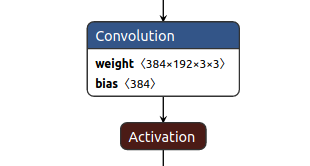

In [6]:
from IPython.display import Image
Image(filename='imgs/alexnet_block1_mxnet.png') 

## Properties

  - This block has 2 layers
        - conv -> relu

## Alexnet block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

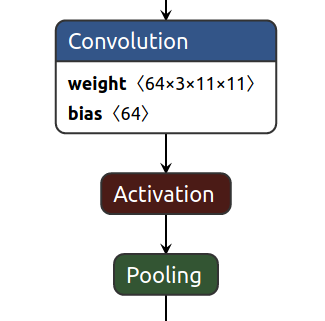

In [7]:
from IPython.display import Image
Image(filename='imgs/alexnet_block2_mxnet.png')

## Properties

  - This block has 3 layers
        - conv -> relu -> max-pool

## Alexnet fully connected chain

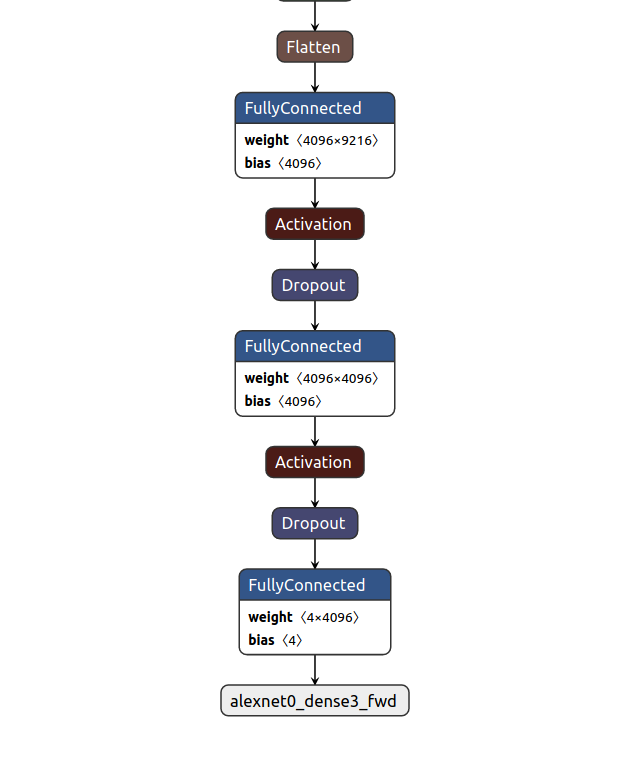

In [8]:
from IPython.display import Image
Image(filename='imgs/alexnet_block_fc_mxnet.png')

## Alexnet Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

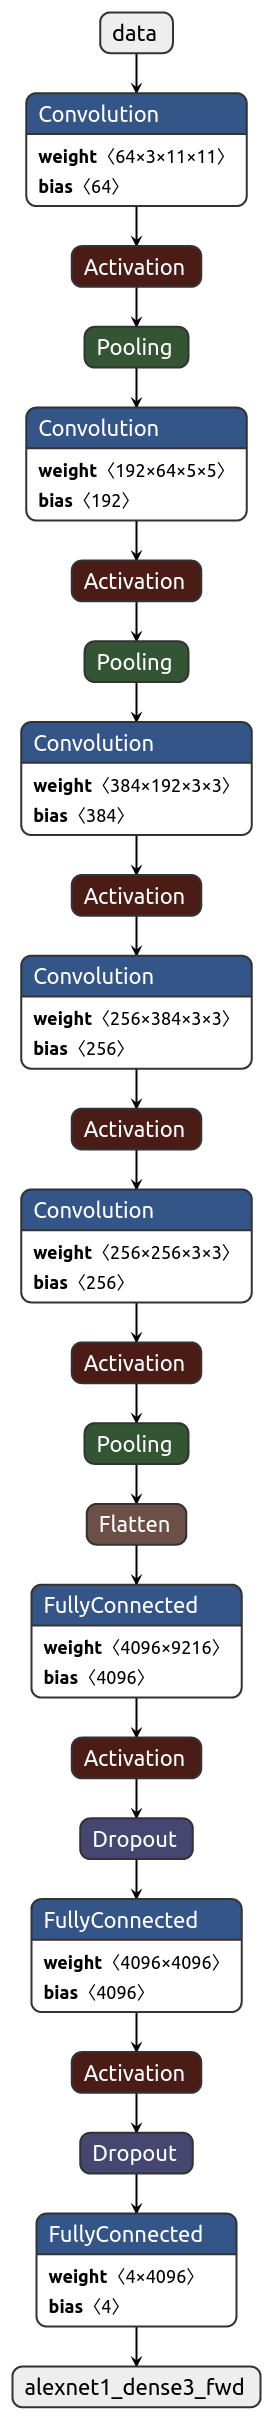

In [20]:
from IPython.display import Image
Image(filename='imgs/alexnet_mxnet.png') 

## Properties

  - This network 
    - has 3 type-1 blocks
    - has 2 type-2 blocks
    - post these blocks the type-3 (fc) block exists

<a id='3'></a>
# Train the classifier

In [8]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.759, Train-loss: 0.911 | Val-acc: 0.886905, Val-loss: 0.350, | time: 5.6 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.857, Train-loss: 0.432 | Val-acc: 0.875000, Val-loss: 0.474, | time: 6.9 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.896, Train-loss: 0.316 | Val-acc: 0.875000, Val-loss: 0.597, | time: 6.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.899, Train-loss: 0.380 | Val-acc: 0.901786, Val-loss: 0.320, | time: 8.6 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.913, Train-loss: 0.246 | Val-acc: 0.892857, Val-loss: 0.449, | time: 5.9 sec

    Training completed in: 0m 26s
    Best val Acc:          0.901786

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/1_alexnet/workspace/Project/Alexnet/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/1_alexnet/workspace/Project/Alexnet/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Run inference on trained classifier

In [9]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "Alexnet", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/Project/Alexnet/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Project
    Experiment: Alexnet
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/1_alexnet/workspace/Project/Alexnet/



Prediction
    Image name:         weather/test/test1.jpg
    Predicted class:      cloudy
    Predicted score:      9.24822998046875



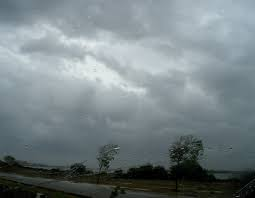

In [10]:
output = gtf.Infer(img_name = "weather/test/test1.jpg");
from IPython.display import Image
Image(filename='weather/test/test1.jpg') 

Prediction
    Image name:         weather/test/test2.jpg
    Predicted class:      shiny
    Predicted score:      11.849170684814453



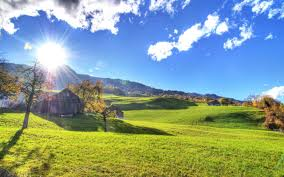

In [11]:
output = gtf.Infer(img_name = "weather/test/test2.jpg");
from IPython.display import Image
Image(filename='weather/test/test2.jpg') 